# High Park WRF-Chem PM<sub>2.5</sub>  

**Author:** Ryan Gan
**Date Created:** 2018-10-16

This Jupyter notebook contains python code that explores the estimates of WRF-Chem PM<sub>2.5</sub> for the High Park fire created by Will.

In [175]:
# loading modules
# numpy for arrays
import numpy as np
import pandas as pd 
# plotting packages
from matplotlib import pyplot as plt
import seaborn as sns
# netcdf module
import netCDF4 as nc 
# import dataset
from netCDF4 import Dataset
# import interpolate from scipy
from scipy import interpolate

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#WRF-Chem-15-x-15-km-Grids" data-toc-modified-id="WRF-Chem-15-x-15-km-Grids-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>WRF-Chem 15 x 15 km Grids</a></span></li><li><span><a href="#Colorado-Grid-ID" data-toc-modified-id="Colorado-Grid-ID-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Colorado Grid ID</a></span></li></ul></div>

## WRF-Chem 15 x 15 km Grids

Exploring the 15 x 15 km grid to understand it's structure and what it contains. 

In [187]:
# read nc files -----
wrf_pm = Dataset('../data/smoke/HighParkPM25_15KM.nc')

I'm going to start by printing out a summary of the variables in Will's NetCDF file.

In [188]:
# print out summary of wrf nc
print(wrf_pm)

# print out each variable detail
for v in wrf_pm.variables:
    print(wrf_pm.variables[v])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    description: Surface PM2.5 Predictions for High Park based on WRF-Chem sims: Written by William Lassman, 2017-05-05
    dimensions(sizes): time(109), z(1), x(194), y(248)
    variables(dimensions): float64 XLAT(time,z,x,y), float64 XLONG(time,z,x,y), int32 time(time), float64 PM2.5(time,z,x,y)
    groups: 

<class 'netCDF4._netCDF4.Variable'>
float64 XLAT(time, z, x, y)
    units: degrees
    long_name: Degrees latitude
    var_desc: Time [s]
unlimited dimensions: 
current shape = (109, 1, 194, 248)
filling off

<class 'netCDF4._netCDF4.Variable'>
float64 XLONG(time, z, x, y)
    units: degrees
    long_name: Degrees longitude
    var_desc: Time [s]
unlimited dimensions: 
current shape = (109, 1, 194, 248)
filling off

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: date and time
    long_name: Date string and time of day (UTC)
    var_desc: Time [s]
unlimited dimen

Extracting out arrays of latitude, longitude, time, and PM<sub>2.5</sub>.

In [189]:
# extract latitude (only taking first date)
lat = wrf_pm.variables['XLAT'][0,0,:,:]
# extract longitude (only taking first date)
lon = wrf_pm.variables['XLONG'][0,0,:, :]
# extract time
time = wrf_pm.variables['time'][:]
# extract pm2.5
pm = wrf_pm.variables['PM2.5'][:,0,:,:]

Printing out minimum, mean, and max PM<sub>2.5</sub> values.

In [190]:
print(np.min(pm), np.mean(pm), np.max(pm))

0.0 1.0033802939821073 167.48187255859375


Flattening the latitude and longitude arrays and plotting to see the extent of the grid.

In [191]:
# flatten latitude and longitude points of the grid
glats = lat.flatten()
glons = lon.flatten()

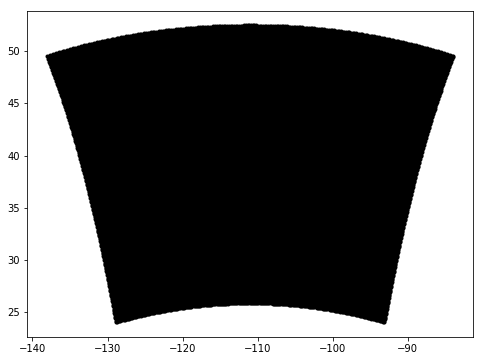

In [192]:
# plot grid points
plt.figure(figsize=(8,6))
plt.plot(glons,glats, marker='.', color='k', linestyle='none')
plt.show()

## Colorado Grid ID

In [180]:
# read grid ids
krig_coords = pd.read_csv('../data/smoke/krig_grid_id_coords.csv')

In [181]:
krig_coords.head()

,GRID_ID,lon,lat
0,19549.0,-109.310725,36.720708
1,19550.0,-109.329262,36.866039
2,19551.0,-109.347875,37.011378
3,19552.0,-109.366563,37.156731
4,19553.0,-109.385326,37.302085


Flatten PM<sub>2.5</sub> data.

In [147]:
# flatten pm values and transpose
pm_flat = pm.reshape(109,48112).T
pm_flat.shape

(48112, 109)

In [105]:
# lat lon bounds
latbounds = [40.9509, 42.0511]
lonbounds = [-102.0424, -109.0489]

Finding the array indices that contain Colorado grid points.

In [160]:
co_lat = np.where(lat < latbounds[1])

In [133]:
# subset colorado lats
co_lat = lat[lat_li:lat_ui]
co_lon = glons[lon_li:lon_ui]
# print dimensions
#print(np.min(co_lon), np.max(co_lon), np.min(co_lat), np.max(co_lat))

I can't figure out how to get the appropriate time interval. I will need to ask Will and Bonne.